<a href="https://colab.research.google.com/github/Venkatpandey/DataScience_ML/blob/main/featureSelection/PCA_z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA - Principal Component Analysis**
Used in Feature selection:- Helps getting rid of Non-Important feature, by reducing its dimentions.


*   Scale The feature before applying PCA
*   Expect Some accuracy drop after applying PCA







In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

*Data taken from https://www.kaggle.com/fedesoriano/heart-failure-prediction*

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/Venkatpandey/DataScience_ML/main/dataset/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


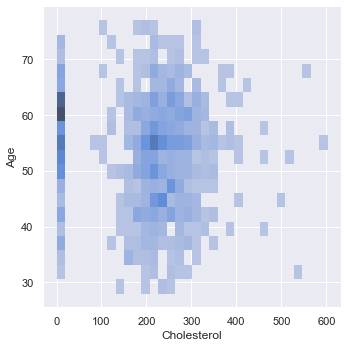

In [32]:
sns.set_theme()
sns.displot(x = data['Cholesterol'], y = data['Age'])

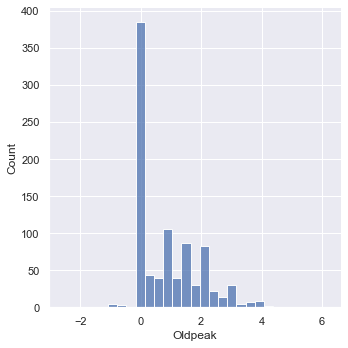

In [33]:
sns.displot(data['Oldpeak'])

In [34]:
from scipy import stats
def detect_outliers(col):
  z = np.abs(stats.zscore(col))
  idx_outlier = np.where(z>3, True,False)
  return pd.Series(idx_outlier, index=col.index)

In [35]:
idx = detect_outliers(data['Oldpeak'])
print(idx)

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [36]:
display(data.loc[idx==True].describe().round(3))

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,7.000,7.000,7.000,7.000,7.000,7.000,7.000
mean,54.429,138.857,214.000,0.143,133.714,3.857,0.857
std,5.682,26.175,107.705,0.378,12.829,2.946,0.378
min,46.000,100.000,0.000,0.000,111.000,-2.600,0.000
25%,50.500,127.000,190.500,0.000,127.500,4.200,1.000
50%,55.000,140.000,231.000,0.000,140.000,4.400,1.000
75%,58.500,150.000,284.000,0.000,142.500,5.300,1.000
max,62.000,178.000,318.000,1.000,145.000,6.200,1.000


In [37]:
print(data.loc[idx==False])

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

# **Encode All text datapoints**

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [40]:
dfle = data
dfle.Sex = le.fit_transform(dfle.Sex)
dfle.ChestPainType = le.fit_transform(dfle.ChestPainType)
dfle.RestingECG = le.fit_transform(dfle.RestingECG)
dfle.ExerciseAngina = le.fit_transform(dfle.ExerciseAngina)
dfle.ST_Slope = le.fit_transform(dfle.ST_Slope)
dfle.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
xct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto', drop='first'), [1,2,6,8,10])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)


In [67]:
x_train = xct.fit_transform(dfle)

display(x_train)

array([[  1. ,   1. ,   0. , ..., 172. ,   0. ,   0. ],
       [  0. ,   0. ,   1. , ..., 156. ,   1. ,   1. ],
       [  1. ,   1. ,   0. , ...,  98. ,   0. ,   0. ],
       ...,
       [  1. ,   0. ,   0. , ..., 115. ,   1.2,   1. ],
       [  0. ,   1. ,   0. , ..., 174. ,   0. ,   1. ],
       [  1. ,   0. ,   1. , ..., 173. ,   0. ,   0. ]])

## **Lets Automate oulier detection for all columns in DataFrame**

In [68]:
df_outliers = pd.DataFrame()
data_x = pd.DataFrame(x_train)
#display(data_x.describe().columns)

for col in data_x.describe().columns:
  df_outliers[col] = detect_outliers(data_x[col])

df_outliers.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
test_outLiers = df_outliers.apply(lambda x: np.any(x), axis=1)
print(len(test_outLiers), df_outliers.shape)

918 (918, 16)


In [70]:
print(test_outLiers)

0      False
1      False
2      False
3      False
4      False
       ...  
913     True
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


**Clean dataset with detected outliers**

In [71]:
clean_x_train = data_x.loc[test_outLiers==False]
print(clean_x_train.head())

    0    1    2    3    4    5    6    7    8     9      10     11   12  \
0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  40.0  140.0  289.0  0.0   
1  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  49.0  160.0  180.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  37.0  130.0  283.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  48.0  138.0  214.0  0.0   
4  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  54.0  150.0  195.0  0.0   

      13   14   15  
0  172.0  0.0  0.0  
1  156.0  1.0  1.0  
2   98.0  0.0  0.0  
3  108.0  1.5  1.0  
4  122.0  0.0  0.0  


In [72]:
ytr = clean_x_train[15]
print(ytr)
xtr = clean_x_train.drop(labels=15, axis=1)
#print(xtr)

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
912    1.0
914    1.0
915    1.0
916    1.0
917    0.0
Name: 15, Length: 854, dtype: float64


# **Scaling the dataset**

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
x_train_sca = scaler.fit_transform(xtr)
print(clean_x_train.shape)

(854, 16)


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_sca, ytr, test_size=0.2, random_state=42)
print(y_train)

846    1.0
104    1.0
848    1.0
562    0.0
455    0.0
      ... 
72     1.0
110    0.0
286    0.0
460    1.0
105    0.0
Name: 15, Length: 683, dtype: float64


**Test Accuracy with Multiple Model**

In [76]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model_param = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20,30],
            'kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
      'model' : RandomForestRegressor(),
      'params' : {
          'n_estimators' : [1,5,10]
      }
    },
    'logistic_regressions' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'gaussian' : {
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing' : [1.0, 2.5]
        }
    },
    'decisionTree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [10]

        }
    }
}

In [77]:
scores = []
from sklearn.model_selection import GridSearchCV
for mn,mp in model_param.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model' : mn,
      'best_score' : clf.best_score_
  })

print(pd.DataFrame(scores, columns=('model', 'best_score')))

                  model  best_score
0                   svm    0.874120
1         random_forest    0.490329
2  logistic_regressions    0.853650
3              gaussian    0.862419
4          decisionTree    0.799410


In [78]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
X_pca = pca.fit_transform(x_train_sca)
X_pca.shape

(854, 10)

In [79]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, ytr, test_size=0.2, random_state=42)

In [80]:
scores_pca = []
for mn,mp in model_param.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train_pca, y_train_pca)
  scores_pca.append({
      'model' : mn,
      'best_score' : clf.best_score_
  })

print(pd.DataFrame(scores_pca, columns=('model', 'best_score')))

                  model  best_score
0                   svm    0.868280
1         random_forest    0.556792
2  logistic_regressions    0.858040
3              gaussian    0.852179
4          decisionTree    0.819944
